# Clasificación de cancer con una red neuronal

En este notebook se va a desarrollar la implementación de una red neuronal de 3 capas, con 9 entredas, 15 neuronas en la capa oculta y una neurona con funcion de salida sigmoide en la última capa. El objetivo es determinar, partiendo de un csv, la naturaleza de los tumores en funcion de sus características.
Para el mejor entendimiento del ejercicio, el notebook se separa en dos secciones:
- Preparación de los datos.
- Instanciación de la red neuronal (desarrollada en NeuronalNetwork.py) y uso con los parámetros más óptimos encontrados.

## Preparación de los datos

### Imports

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from NeuronalNetwork_sin_escalado import *

### Load and format data

El dataset viene con la salida defindia como 2 ó 4, la cambiamos a 0 ó 1 para poder trabajar. También se eliminan aquellas filas con algún valor nulo. <br> Las entradas de la red neuronal corresponderán a: 
- Clump Thickness
- Uniformity of Cell Size
- Uniformity of Cell Shape
- Marginal Adhesion
- Single Epithelial Cell Size
- Bare Nuclei
- Bland Chromatin
- Normal Nucleoli 
- Mitoses

In [34]:
#load and format data
df = pd.read_csv('wisconsin-cancer-dataset.csv',header=None)
df.head(5)
df.iloc[:,10].replace(2, 0,inplace=True)
df.iloc[:,10].replace(4, 1,inplace=True)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0


### Creation of train and validation sets

Para la posterior evalucaión de la clasificación, creamos un set de entrenamiento y otro menor de validación.

In [35]:
x=df.iloc[:,1:11]
x=df.iloc[0:500,1:10].values.transpose()
y=df.iloc[0:500,10:].values.transpose()
xval=df.iloc[501:683,1:10].values.transpose()
yval=df.iloc[501:683,10:].values.transpose()
print(x)

[[ 5.  5.  3. ...  5.  3.  6.]
 [ 1.  4.  1. ...  1.  1.  6.]
 [ 1.  4.  1. ...  1.  1.  7.]
 ...
 [ 3.  3.  3. ...  1.  2.  8.]
 [ 1.  2.  1. ...  1.  1. 10.]
 [ 1.  1.  1. ...  1.  1.  2.]]


## Netwotk Development

### Declaring nn

Declaramos la red neuronal con los valores de entrenamiento y un learning rate de 0.02. La red funciona con una arquitectura [9 - 15 - 1], la cual utiliza funciones de salida lineales en la capa intermedia y una sigmoidal en la de salida. Utiliza como función de error, en lugar del clásico MSE, el Cross-Entropy. 
El algortimo de aprendizaje utilizado es el descenso por gradiente, el cual implementa el algoritmo de backpropagation.

In [36]:
nn = NeuronalNetwork(x,y,0.01)
nn.gradient_descend(50000)

C:\Users\santi\Desktop\MyLearningPath-master\cancer_predictor_ex\NeuronalNetwork_sin_escalado.py:72: RuntimeWarning: divide by zero encountered in true_divide
  derror = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh)) #derivate of error function, Cross-Entropy, not MSE
C:\Users\santi\Desktop\MyLearningPath-master\cancer_predictor_ex\NeuronalNetwork_sin_escalado.py:72: RuntimeWarning: invalid value encountered in true_divide
  derror = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh)) #derivate of error function, Cross-Entropy, not MSE
C:\Users\santi\Desktop\MyLearningPath-master\cancer_predictor_ex\NeuronalNetwork_sin_escalado.py:73: RuntimeWarning: invalid value encountered in multiply
  s2 = derror * dSigmoid(self.param['N2']) #s2 = derivate of error function * derivate of sigmoid function


### Predict and comparing training acurrancy vs validation acurrancy

Comparamos el acierto desempeñado por nuestra red neuronal, tanto en el test de entrenamiento como en el de validación. Se prefiere un mejor resultado en el de validación que en el de entrenamiento, ya que esto es signo de que, a priori, no existe ningún tipo de problema de vias o de variance.

In [37]:
pred_train = nn.predict(x, y)
pred_test = nn.predict(xval, yval)

Acc: 0.6060000000000001
Acc: 0.7747252747252746


### Function to plot the performance of the nn (skewed classes)

In [38]:
def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('0         Predicted         1')
    plt.ylabel('1          Actual            0')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(np.ndarray([0,1]))
    plt.yticks(np.ndarray([0,1]))
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] > (cf.max()*0.7) else 'black')
    plt.show();


### Check how well it predict!

Dado los buenos resultados obtenidos, se procede a hacer la predicción, tanto con los datos de entrenamiento como con los de validación. 

Acc: 0.6060000000000001


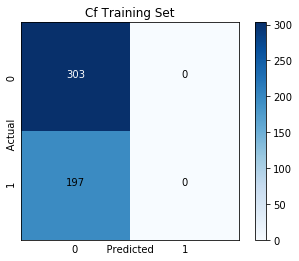

Acc: 0.7747252747252746


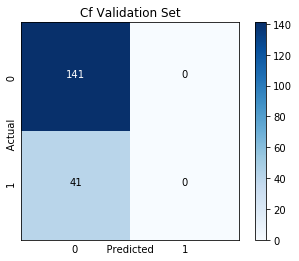

In [39]:
nn.threshold=0.85#0.85
nn.X,nn.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')